In [2]:
def bracket_minimum(f, x, s=1e-2, k=2.0):
    
    a, ya = x, f(x)
    b, yb = a+s, f(a+s)
    print(f'init: (a:{a:.4f}, b:{b:.4f}), (ya:{ya:.4f}, yb:{yb:.4f})')
    
    if yb > ya:
        a, b = b, a
        ya, yb = yb, ya
        s = -s
    
    while True:
        c, yc = b+s, f(b+s)
        print(f'step: (a:{a:.4f}, b:{b:.4f}, c:{c:.4f}), (ya:{ya:.4f}, yb:{yb:.4f}, yc:{yc:.4f})')
        
        if yc > yb:
            return (a, c) if a < c else (c, a)
        else:
            a, ya, b, yb = b, yb,c, yc
            s *= k

### 황금분할 탐색법

In [3]:
import numpy as np

In [21]:
def golden_section_search(f, x, epsilon=1e-6):
    
    a, b = bracket_minimum(f, x)
    print(f'init: (a:{a:.4f}, b:{b:.4f})')
    
    distance = abs(a-b)
    
    psi = 0.5 * (1.+np.sqrt(5))
    rho = psi ** (-1)
    
    d = rho*b + (1.-rho)*a
    yd = f(d)
    
    
    i = 1
    while distance > epsilon:
        
        c = rho*a + (1.-rho)*b
        yc = f(c)
        
        if yc < yd:
            b, d, yd = d, c, yc
        else:
            a, b = b, c
        
        pa, pb = (a, b) if a < b else (b, a)
        print(f'{i}: (a: {pa:.4f}, b:{pb:.4f})')
        
        distance = abs(a-b)
        
        i += 1
        
    a, b = (a, b) if a < b else (b, a)
    
    x = 0.5 * (a+b)
    y = f(x)
    
    return x, y

In [8]:
f = lambda x: 0.5 * x**2 - x
df = lambda x: x-1

In [14]:
def f(x):
    return 0.5 * x**2 - x

def df(x):
    return x -1

In [10]:
import matplotlib.pyplot as plt

In [11]:
x = np.arange(0., 2., 1e-2)

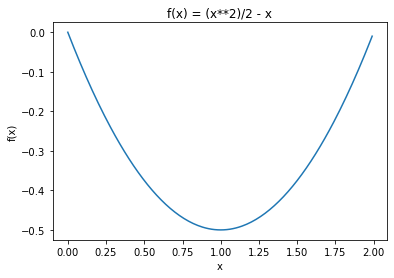

In [15]:
plt.title('f(x) = (x**2)/2 - x')
plt.plot(x, f(x))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()          

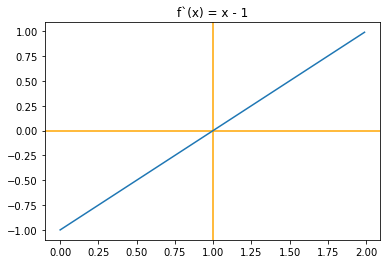

In [17]:
# f(x)의 도함수
plt.title('f`(x) = x - 1')
plt.plot(x, df(x))
plt.axhline(y = 0, color = 'orange')
plt.axvline(x = 1, color = 'orange')
plt.show()

In [22]:
golden_section_search(f, 0)

init: (a:0.0000, b:0.0100), (ya:0.0000, yb:-0.0100)
step: (a:0.0000, b:0.0100, c:0.0200), (ya:0.0000, yb:-0.0100, yc:-0.0198)
step: (a:0.0100, b:0.0200, c:0.0400), (ya:-0.0100, yb:-0.0198, yc:-0.0392)
step: (a:0.0200, b:0.0400, c:0.0800), (ya:-0.0198, yb:-0.0392, yc:-0.0768)
step: (a:0.0400, b:0.0800, c:0.1600), (ya:-0.0392, yb:-0.0768, yc:-0.1472)
step: (a:0.0800, b:0.1600, c:0.3200), (ya:-0.0768, yb:-0.1472, yc:-0.2688)
step: (a:0.1600, b:0.3200, c:0.6400), (ya:-0.1472, yb:-0.2688, yc:-0.4352)
step: (a:0.3200, b:0.6400, c:1.2800), (ya:-0.2688, yb:-0.4352, yc:-0.4608)
step: (a:0.6400, b:1.2800, c:2.5600), (ya:-0.4352, yb:-0.4608, yc:0.7168)
init: (a:0.6400, b:2.5600)
1: (a: 0.6400, b:1.8266)
2: (a: 0.6400, b:1.3734)
3: (a: 0.6400, b:1.0933)
4: (a: 0.8131, b:1.0933)
5: (a: 0.9201, b:1.0933)
6: (a: 0.9201, b:1.0271)
7: (a: 0.9610, b:1.0271)
8: (a: 0.9863, b:1.0271)
9: (a: 0.9863, b:1.0115)
10: (a: 0.9959, b:1.0115)
11: (a: 0.9959, b:1.0055)
12: (a: 0.9959, b:1.0019)
13: (a: 0.9982, b:1.

(0.9999999426899366, -0.49999999999999833)

### 이분법
- 목적함수의 도함수를 아는 경우에만 사용 가능

In [23]:
def bracket_sign_change(df, a, b, k=2):
    
    if a > b:
        a, b, = b, a
        
    center, half_width = 0.5*(b+a), 0.5*(b-a)
    
    while df(a)*df(b) > 0:
        
        half_width *= k
        
        a = center - half_width
        b = center + half_width
        
    return (a, b)

In [24]:
bracket_sign_change(df, 0, 0.1)

(-1.55, 1.6500000000000001)

In [27]:
def bisection(df, x, epsilon=1e-6):
    
    a, b = bracket_sign_change(df, x-epsilon, x+epsilon)
    print(f'init: (a:{a:.4f}, b:{b:.4f})')
    
    ya, yb = df(a), df(b)
    
    if ya == 0:
        b = a
    if yb == 0:
        a = b
        
    i = 1    
    while b-a > epsilon:
        
        x = 0.5 * (a+b)
        y = df(x)
        
        if y == 0:
            a, b = x, x
        elif y*ya > 0:
            a = x
        else:
            b = x
        print(f'step: a:{a:.4f}, b:{b:.4f}, y:{y:.4f}, ya:{ya:.4f}')
        
        i += 1
        
        x = 0.5 * (a + b)
        y = df(x)
    
    return x, y

In [28]:
bisection(df, 0)

init: (a:-1.0486, b:1.0486)
step: a:0.0000, b:1.0486, y:-1.0000, ya:-2.0486
step: a:0.5243, b:1.0486, y:-0.4757, ya:-2.0486
step: a:0.7864, b:1.0486, y:-0.2136, ya:-2.0486
step: a:0.9175, b:1.0486, y:-0.0825, ya:-2.0486
step: a:0.9830, b:1.0486, y:-0.0170, ya:-2.0486
step: a:0.9830, b:1.0158, y:0.0158, ya:-2.0486
step: a:0.9994, b:1.0158, y:-0.0006, ya:-2.0486
step: a:0.9994, b:1.0076, y:0.0076, ya:-2.0486
step: a:0.9994, b:1.0035, y:0.0035, ya:-2.0486
step: a:0.9994, b:1.0015, y:0.0015, ya:-2.0486
step: a:0.9994, b:1.0004, y:0.0004, ya:-2.0486
step: a:0.9999, b:1.0004, y:-0.0001, ya:-2.0486
step: a:0.9999, b:1.0002, y:0.0002, ya:-2.0486
step: a:0.9999, b:1.0001, y:0.0001, ya:-2.0486
step: a:1.0000, b:1.0000, y:0.0000, ya:-2.0486


(1.0, 0.0)